In [51]:
import numpy as np
import random
from sympy import *
import math
import matplotlib.pyplot as plt
import seaborn as sns

def uniform_dist_instances(number, a, b):
  vec = [random.uniform(a, b) for _ in range(0, number)]
  return vec

def compute_gaussian_kernel(h, x_obs):
  x = Symbol('x', real=True)
  exponent = -((x - x_obs)**2)/(2*h)
  numerator = exp(exponent)
  denominator = math.sqrt(2*math.pi*h)
  return numerator/denominator

def compute_laplacian_kernel(h, x_obs):
  x = Symbol('x', real=True)
  exponent = -(sympy.Abs(x - x_obs))/(2*h)
  numerator = exp(exponent)
  denominator = math.sqrt(2*math.pi*h)
  return numerator/denominator

def approximate_function(vec, h, kernel_type = "Gaussian"):
  sum = 0
  if kernel_type == "Gaussian":
    for i in range(0, len(vec)):
      sum = sum + compute_gaussian_kernel(h, vec[i])
  elif kernel_type == "Laplacian":
    for i in range(0, len(vec)):
      sum = sum + compute_laplacian_kernel(h, vec[i])
  return sum/len(vec)


In [60]:
def plot_approximate_function(outer_support = (-5, 5), \
                              trials=100, function_type="Uniform", inner_support=(0, 1), \
                              kernel_type = "Gaussian"):
  if function_type == "Uniform":
    vec = uniform_dist_instances(trials, inner_support[0], inner_support[1])

  h = 1
  precision = 10
  print(vec)
  approx_function = approximate_function(vec, h, kernel_type)
  x = Symbol('x', real=True)
  val = [approx_function.subs({x:(x_i/precision)}) \
         for x_i in range(outer_support[0]*precision, \
         outer_support[1]*precision, 1)]
  print()
  x_precision = 10
  y_precision = 10
  print(val)
  x_axis = [x/x_precision for x in range(outer_support[0]*x_precision, \
                                         outer_support[1]*x_precision, 1)]
  y_axis = [y/y_precision for y in range(0*y_precision, 2*y_precision, 1)]
  actual = [1 for _ in range(0, len(val))]
  print()
  print(x_axis)
  print()
  print(y_axis)
  plt.figure(figsize=(15, 10))
  plt.xticks(x_axis)
  plt.yticks(y_axis)
  plt.axis([-5, 5, 0, 2])
  plt.plot(x_axis,val, ".",label = "approximate")
  plt.plot(x_axis,actual, "-", label = "actual")
  plt.ylabel("density")
  plt.legend()
  plt.show()


[0.9246505418951423, 0.8482902145163672, 0.8002424302105086, 0.7806497950805515, 0.516249020879402, 0.8423031553139726, 0.9292612272667695, 0.5656314260766028, 0.004982148500409456, 0.4218807626488673, 0.8229759810622445, 0.753217808610584, 0.3684464068880603, 0.528052471930202, 0.03669645647176334, 0.9639933384079724, 0.38045205195858245, 0.4614382514971105, 0.4301916176246704, 0.9416799203838692, 0.20546405665454426, 0.17458203785868653, 0.9156872374616893, 0.3580156325990843, 0.09527714339012905, 0.697189659584279, 0.5692986986019112, 0.22433522052139054, 0.07630110457346517, 0.6678309207654967, 0.8624572206006765, 0.984656598888627, 0.9789628336922492, 0.3045484682745425, 0.8378590209309844, 0.05367555082375841, 0.922222751259461, 0.45271146470835055, 0.4300614445289771, 0.4218244416122944, 0.39318595582798765, 0.370977233431554, 0.4479887567578804, 0.7753982211495103, 0.631760691048776, 0.3142087611383113, 0.9646121063911617, 0.9931975847789577, 0.8761784162313089, 0.1992880031562

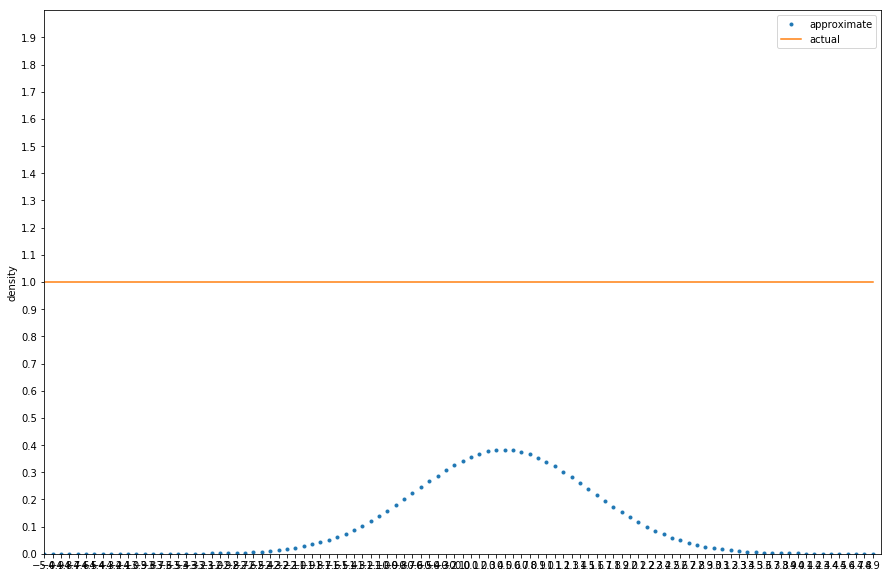

In [61]:
plot_approximate_function()

In [35]:
vec = uniform_dist_instances(100, 0, 1)
approx_function = approximate_function(vec, 0.01, "Gaussian")

In [49]:
x = Symbol('x', real = True)
approx_function.subs({x:1.2})

0.0103036738162758